0. 이 장에 필요한 파이썬 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 3-1 가전제품 출하량: 선그래프

In [2]:
shipments_df = pd.read_csv('../data/ApplianceShipments.csv')

In [3]:
shipments_df['Year'] = shipments_df['Quarter'].str[-4:].astype(int)
shipments_df['Qtr']  = shipments_df['Quarter'].str[1].astype(int)

a. 시계열 차트

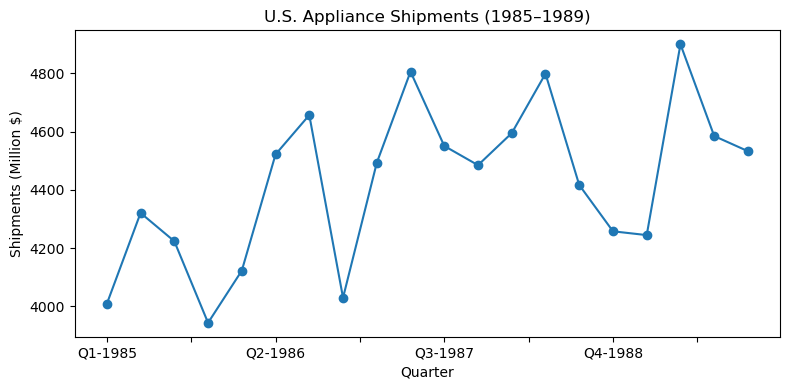

In [4]:
ax = shipments_df.plot(x='Quarter', y='Shipments', marker='o', figsize=(8,4), legend=False)
ax.set_ylabel('Shipments (Million $)')
ax.set_title('U.S. Appliance Shipments (1985–1989)')
plt.tight_layout()
plt.show()

b. 분기별 패턴을 자세히 보기 위해 y축 값 3500 ~ 5000 범위를 확대

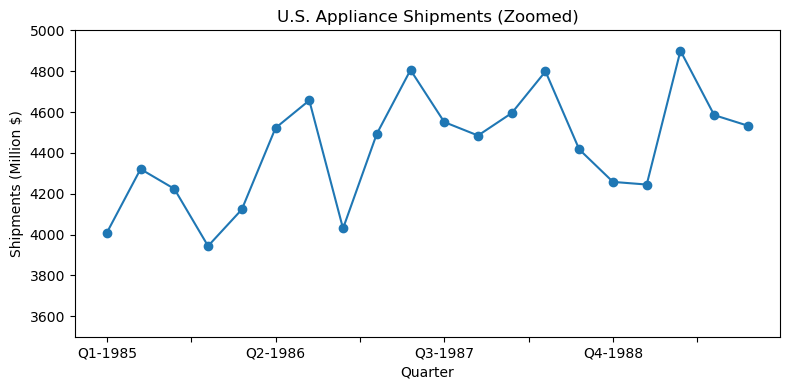

In [5]:
ax = shipments_df.plot(x='Quarter', y='Shipments', marker='o', figsize=(8,4), ylim=[3500,5000], legend=False)
ax.set_ylabel('Shipments (Million $)')
ax.set_title('U.S. Appliance Shipments (Zoomed)')
plt.tight_layout()
plt.show()

c. Q1,Q2,Q3,Q4에 대한 차트 1개에 4개의 꺾은선 그래프

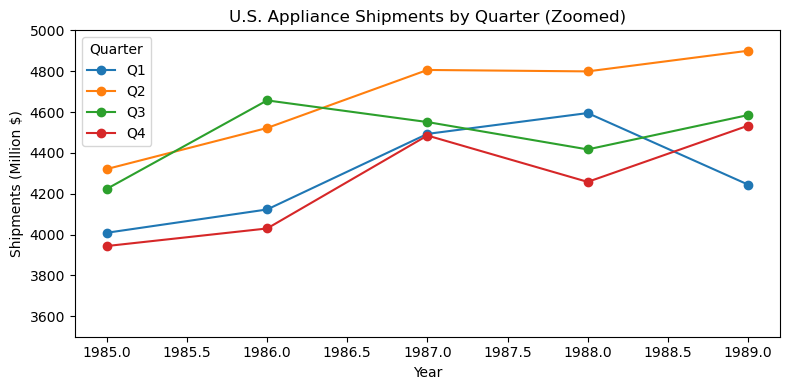

In [6]:
fig, ax = plt.subplots(figsize=(8,4))

for q in [1, 2, 3, 4]:
    subset = shipments_df[shipments_df['Qtr'] == q]
    ax.plot(subset['Year'], subset['Shipments'], marker='o', label=f"Q{q}")

ax.set_ylim(3500, 5000) #y축 확대
ax.set_xlabel("Year")
ax.set_ylabel("Shipments (Million $)")
ax.legend(title="Quarter") #범례 추가
ax.set_title('U.S. Appliance Shipments by Quarter (Zoomed)')

plt.tight_layout()
plt.show()

d. 연도별 집계 - 선 그래프

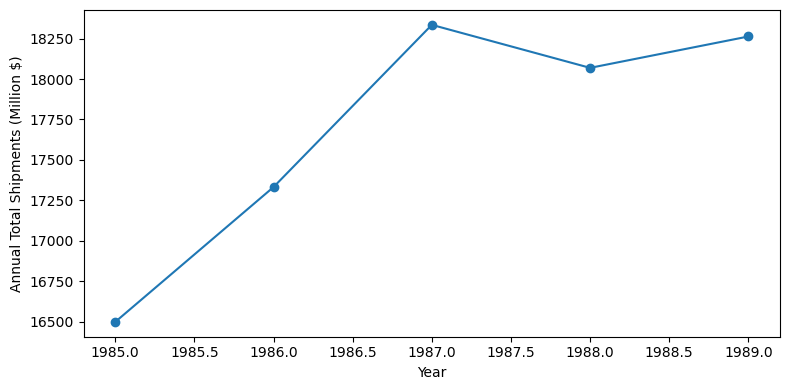

In [7]:
by_year = shipments_df.groupby('Year')['Shipments'].sum()

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(by_year.index, by_year.values, marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Annual Total Shipments (Million $)")
plt.tight_layout()
plt.show()

## 3-2. 승차식 잔디깎이 기계 매출액: 산점도

In [8]:
Mowers_df = pd.read_csv('../data/RidingMowers.csv')

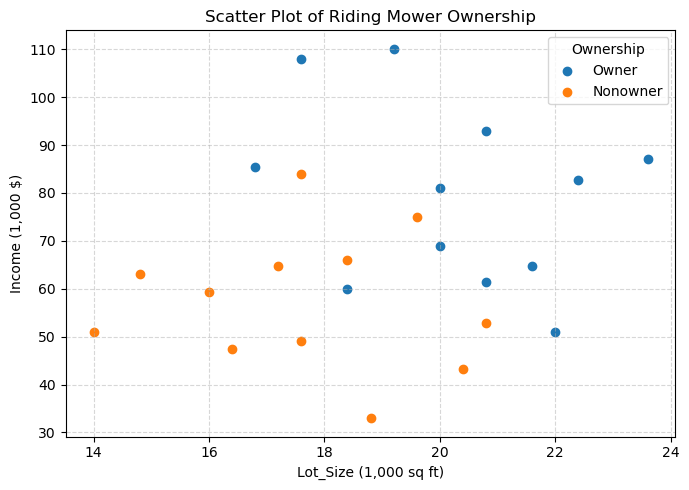

In [9]:
fig, ax = plt.subplots(figsize=(7,5))

for label, color in [('Owner', 'C0'), ('Nonowner', 'C1')]: #색상-코드화
    subset = Mowers_df[Mowers_df['Ownership'] == label]
    ax.scatter(subset['Lot_Size'], subset['Income'],
               label=label, color=color)

ax.set_xlabel('Lot_Size (1,000 sq ft)')
ax.set_ylabel('Income (1,000 $)')
ax.legend(title='Ownership')
ax.set_title('Scatter Plot of Riding Mower Ownership')
ax.grid(True, linestyle='--', alpha=0.5) #격자선을 추가해서 그래프를 읽기 쉽게 함

plt.tight_layout()
plt.show()

## 3.3 런던 컴퓨터 체인점 노트북 판매 실적: 막대그래프와 박스 플롯

In [10]:
Sales_df = pd.read_csv('../data/LaptopSalesJanuary2008.csv')

In [11]:
print(Sales_df.columns) #코드 내 실제 열 이름 확인하기

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'Screen Size (Inches)', 'Battery Life (Hours)',
       'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless?',
       'HD Size (GB)', 'Bundled Applications?', 'OS X Customer',
       'OS Y Customer', 'OS X Store', 'OS Y Store', 'CustomerStoreDistance'],
      dtype='object')


a. 매장별 평균 소매가격 그래프

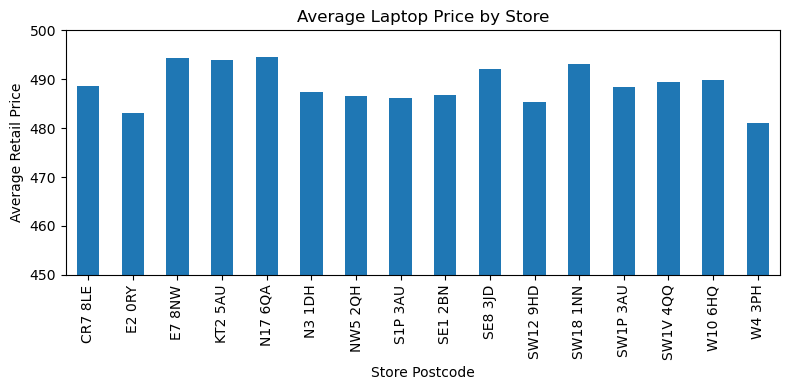

In [12]:
by_store = Sales_df.groupby('Store Postcode')['Retail Price'].mean()

fig, ax = plt.subplots(figsize=(8,4))
by_store.plot(kind='bar', ax=ax)
ax.set_xlabel('Store Postcode')
ax.set_ylabel('Average Retail Price')
ax.set_title('Average Laptop Price by Store')

ax.set_ylim(450, 500) #y축 확대로 매장 간 차이 강조

plt.tight_layout()
plt.show()

a′. 평균 소매 가격이 가장 높은 매장과 가장 낮은 매장

In [13]:
highest_store = by_store.idxmax()
lowest_store  = by_store.idxmin()
print("평균 소매가격이 가장 높은 매장(우편번호):", highest_store)
print("평균 소매가격이 가장 낮은 매장(우편번호):", lowest_store)

평균 소매가격이 가장 높은 매장(우편번호): N17 6QA
평균 소매가격이 가장 낮은 매장(우편번호): W4 3PH


b. 병렬 박스 플롯

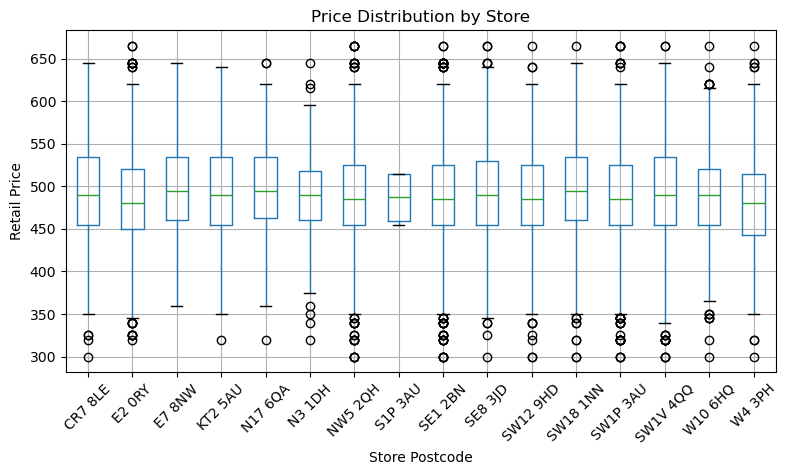

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
Sales_df.boxplot(column='Retail Price', by='Store Postcode', ax=ax)
ax.set_xlabel('Store Postcode')
ax.set_ylabel('Retail Price')
ax.set_title('Price Distribution by Store')
plt.suptitle('') #by= 옵션으로 자동 생성된 전체 제목 제거

plt.xticks(rotation=45) #글자를 회전시켜 가독성을 높임
plt.tight_layout()
plt.show()

평균 소매가격이 가장 높은 매장은 전반적으로 소매가격이 높고, 가격 분포의 범위도 더 넓다. 
반면 평균 소매가격이 가장 낮은 매장은 중앙값이 낮고, 가격 분포가 상대적으로 좁다.